In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [94]:
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\heart.csv')

In [95]:
df

,age,trestbps,chol,thalch,num
0,63,145,233,150,0
1,41,135,203,132,0
2,57,140,192,148,0
3,52,118,186,190,0
4,57,110,201,126,0
...,...,...,...,...,...
903,53,125,0,120,4
904,62,166,170,120,4
905,56,170,0,123,4
906,56,144,208,105,4


In [96]:
df.head()

,age,trestbps,chol,thalch,num
0,63,145,233,150,0
1,41,135,203,132,0
2,57,140,192,148,0
3,52,118,186,190,0
4,57,110,201,126,0


In [97]:
df.describe()

,age,trestbps,chol,thalch,num
count,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.144436
min,29.000000,0.000000,0.000000,60.000000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,4.000000


In [98]:
df.isnull().any()

age         False
trestbps    False
chol        False
thalch      False
num         False
dtype: bool

In [99]:
df.isnull().sum()

age         0
trestbps    0
chol        0
thalch      0
num         0
dtype: int64

In [100]:
df.shape

(908, 5)

In [101]:
df.describe

<bound method NDFrame.describe of      age  trestbps  chol  thalch  num
0     63       145   233     150    0
1     41       135   203     132    0
2     57       140   192     148    0
3     52       118   186     190    0
4     57       110   201     126    0
..   ...       ...   ...     ...  ...
903   53       125     0     120    4
904   62       166   170     120    4
905   56       170     0     123    4
906   56       144   208     105    4
907   57       142   277     182    4

[908 rows x 5 columns]>

In [102]:
df[df.duplicated()].shape

(4, 5)

In [103]:
df[df.duplicated()]

,age,trestbps,chol,thalch,num
235,62,120,220,86,0
339,49,110,200,160,0
588,60,130,186,140,1
765,58,150,219,118,2


In [104]:
df.trestbps.describe()

count    908.000000
mean     133.430617
std       20.401608
min        0.000000
25%      120.000000
50%      130.000000
75%      144.000000
max      200.000000
Name: trestbps, dtype: float64

In [105]:
X = df.drop('trestbps',axis=1)

In [106]:
y = df['trestbps']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((635, 4), (273, 4))

In [109]:
df.trestbps.describe()

count    908.000000
mean     133.430617
std       20.401608
min        0.000000
25%      120.000000
50%      130.000000
75%      144.000000
max      200.000000
Name: trestbps, dtype: float64

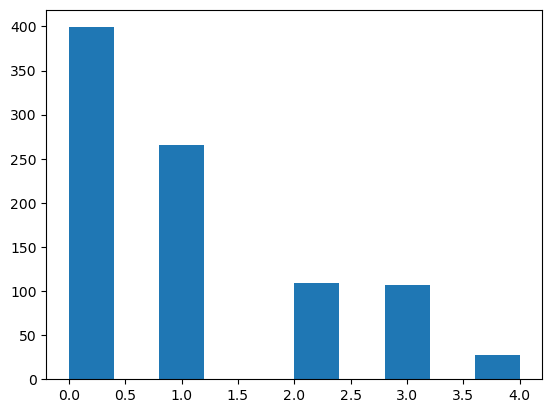

In [110]:
plt.hist('num',data=df)
plt.show()

In [111]:
df1=df.copy()
df1['trestbps_cat'] = pd.cut(x = df1['trestbps'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()

,age,trestbps,chol,thalch,num,trestbps_cat
0,63,145,233,150,0,NaN
1,41,135,203,132,0,NaN
2,57,140,192,148,0,NaN
3,52,118,186,190,0,NaN
4,57,110,201,126,0,NaN


<Axes: xlabel='chol', ylabel='trestbps'>

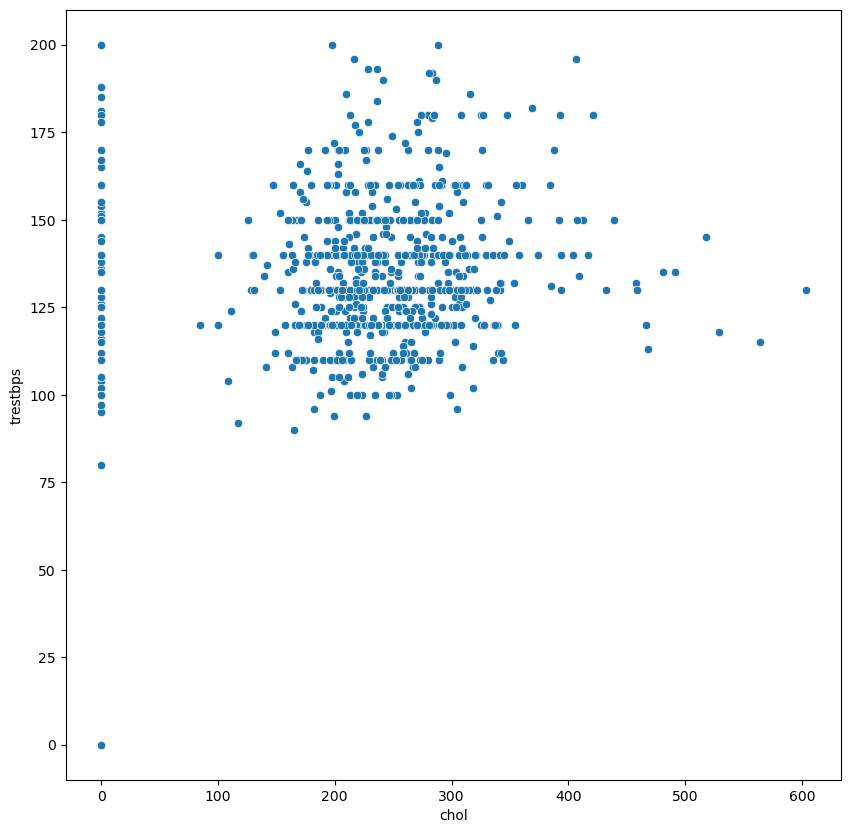

In [112]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data=df, x="chol", y="trestbps")

<Axes: xlabel='chol', ylabel='age'>

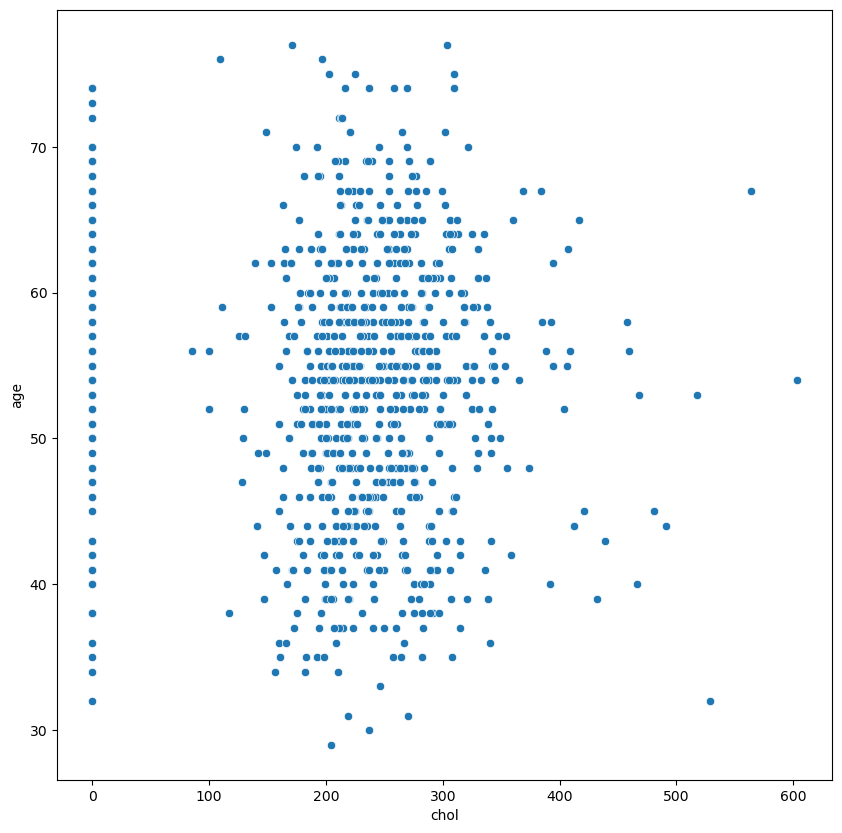

In [113]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data=df, x="chol", y="age")

C:\Users\aaksh\AppData\Local\Temp\ipykernel_7708\3206523200.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"], color = "red", kde = True, bins = 20)


Text(0, 0.5, 'Frequency')

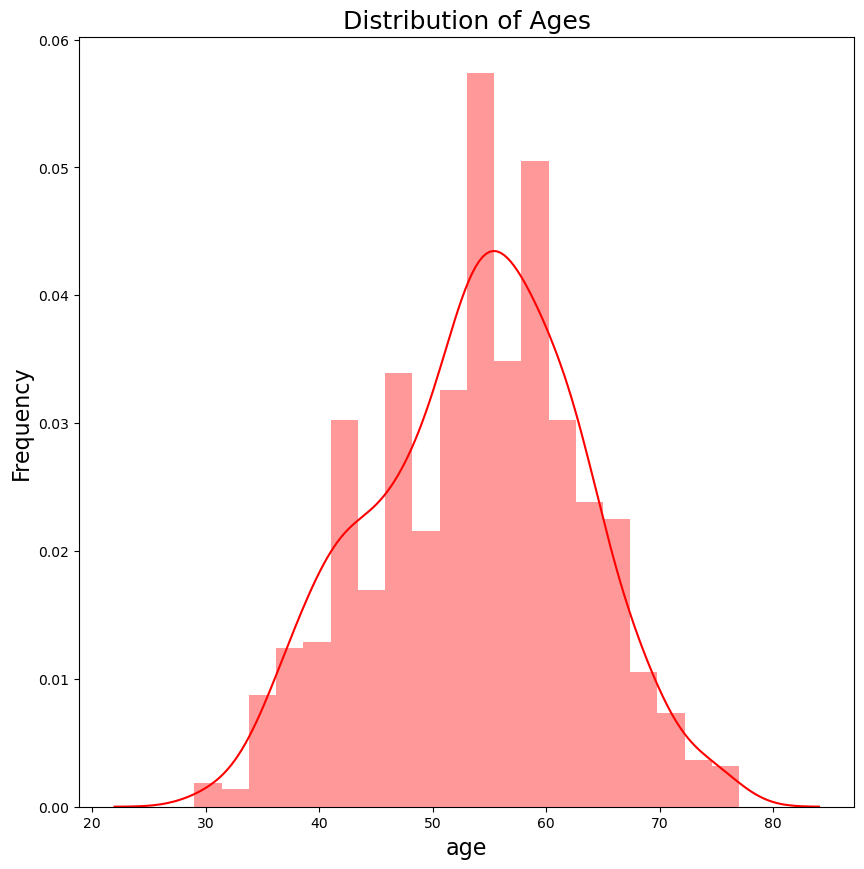

In [114]:
plt.figure(figsize = (10, 10))
sns.distplot(df["age"], color = "red", kde = True, bins = 20)
plt.title("Distribution of Ages", fontsize=18)
plt.xlabel("age", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

C:\Users\aaksh\AppData\Local\Temp\ipykernel_7708\4058316526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["chol"], color = "blue", kde = True, bins = 20)


Text(0, 0.5, 'Frequency')

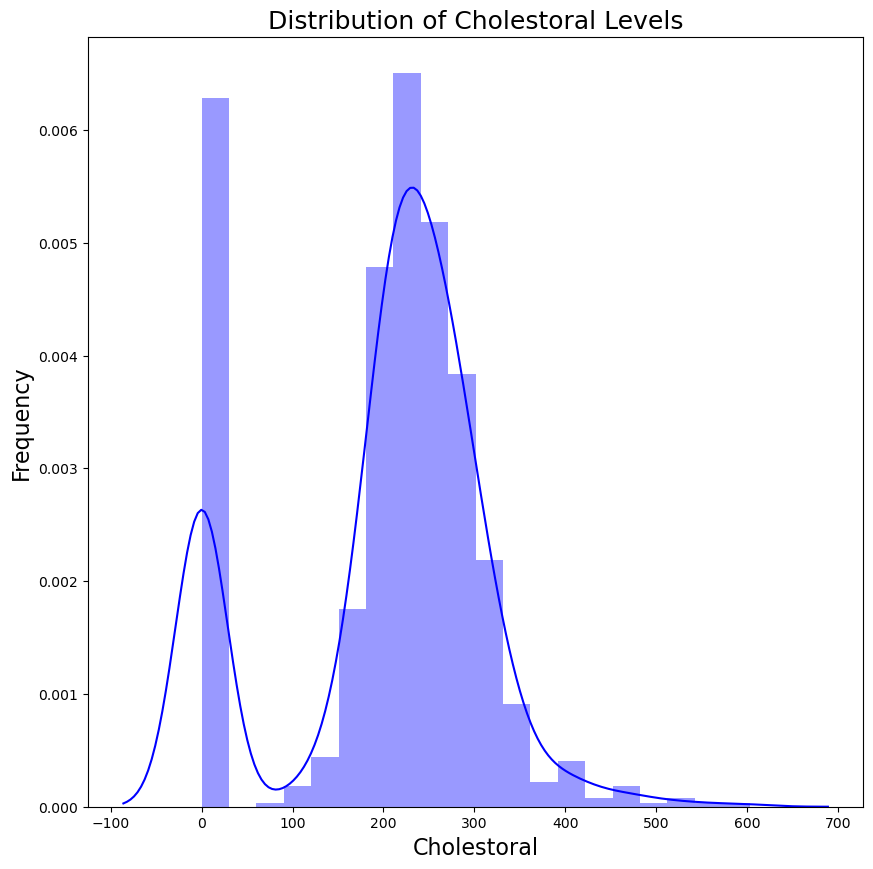

In [115]:
plt.figure(figsize = (10, 10))
sns.distplot(df["chol"], color = "blue", kde = True, bins = 20)
plt.title("Distribution of Cholestoral Levels", fontsize=18)
plt.xlabel("Cholestoral", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

In [116]:
df.head()

,age,trestbps,chol,thalch,num
0,63,145,233,150,0
1,41,135,203,132,0
2,57,140,192,148,0
3,52,118,186,190,0
4,57,110,201,126,0


In [117]:
df.corr()

,age,trestbps,chol,thalch,num
age,1.000000,0.253999,-0.099967,-0.328088,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.323058
num,0.326493,0.137251,-0.238813,-0.323058,1.000000


In [120]:
df.isnull().sum()

age         0
trestbps    0
chol        0
thalch      0
num         0
dtype: int64

In [121]:
df["chol"].unique()

array([233, 203, 192, 186, 201, 228, 276, 211, 260, 175, 237, 226, 273,
       197, 240, 250, 177, 248, 265, 303, 149, 234, 160, 264, 242, 302,
       278, 220, 294, 394, 214, 219, 271, 213, 245, 196, 209, 141, 340,
       318, 243, 238, 222, 208, 236, 178, 275, 308, 223, 204, 269, 256,
       180, 360, 239, 235, 262, 257, 295, 417, 212, 254, 283, 244, 315,
       306, 342, 267, 198, 215, 304, 247, 266, 252, 277, 325, 246, 182,
       168, 255, 195, 199, 253, 321, 157, 183, 205, 210, 288, 354, 221,
       268, 261, 216, 439, 270, 310,   0, 231, 258, 227, 564, 193, 298,
       263, 313, 309, 232, 126, 207, 179, 458, 188, 297, 184, 128, 224,
       229, 328, 347, 171, 274, 200, 365, 206, 163, 187, 241, 251, 481,
       459, 218, 284, 190, 432, 280, 468, 230, 292, 312, 330, 129, 217,
       272,  85, 225, 307, 130, 329, 166, 202, 147, 194, 249, 287, 320,
       326, 291, 344, 281, 339, 358, 412, 259, 289, 305, 421, 173, 100,
       385, 139, 161, 165, 406, 181, 392, 466, 322, 185, 282, 33

In [122]:
df["chol"].unique()

array([233, 203, 192, 186, 201, 228, 276, 211, 260, 175, 237, 226, 273,
       197, 240, 250, 177, 248, 265, 303, 149, 234, 160, 264, 242, 302,
       278, 220, 294, 394, 214, 219, 271, 213, 245, 196, 209, 141, 340,
       318, 243, 238, 222, 208, 236, 178, 275, 308, 223, 204, 269, 256,
       180, 360, 239, 235, 262, 257, 295, 417, 212, 254, 283, 244, 315,
       306, 342, 267, 198, 215, 304, 247, 266, 252, 277, 325, 246, 182,
       168, 255, 195, 199, 253, 321, 157, 183, 205, 210, 288, 354, 221,
       268, 261, 216, 439, 270, 310,   0, 231, 258, 227, 564, 193, 298,
       263, 313, 309, 232, 126, 207, 179, 458, 188, 297, 184, 128, 224,
       229, 328, 347, 171, 274, 200, 365, 206, 163, 187, 241, 251, 481,
       459, 218, 284, 190, 432, 280, 468, 230, 292, 312, 330, 129, 217,
       272,  85, 225, 307, 130, 329, 166, 202, 147, 194, 249, 287, 320,
       326, 291, 344, 281, 339, 358, 412, 259, 289, 305, 421, 173, 100,
       385, 139, 161, 165, 406, 181, 392, 466, 322, 185, 282, 33

In [123]:
len(df.loc[df["chol"] == "?"])

0

In [124]:
len(df.loc[df["thalch"] == "?"])

0

In [125]:
df.loc[(df["trestbps"] == "?")]

,age,trestbps,chol,thalch,num


In [126]:
df.shape

(908, 5)

In [127]:
X = df.drop("chol", axis = 1).copy()

In [128]:
X.head()

,age,trestbps,thalch,num
0,63,145,150,0
1,41,135,132,0
2,57,140,148,0
3,52,118,190,0
4,57,110,126,0


In [129]:
y = df["chol"].copy()

In [130]:
y.head()

0    233
1    203
2    192
3    186
4    201
Name: chol, dtype: int64

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [132]:
dt = dt.fit(X_train, y_train)

In [136]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.4 MB/s eta 0:00:09
   --- ------------------------------------ 0.9/11.0 MB 14.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 18.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 18.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 18.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 18.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 18.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 18.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 18.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.5/11.0 MB 3.8 MB/s eta 0:00:03
   --------- ------------------------------ 2.5/11.0 MB 5.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/11.0 MB 5.7 MB/s eta 0:00:0

  You can safely remove it manually.


In [138]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1] # This code will omit the maximum value for alpha so that we do not remove every leaf

dts = [] # Store our array of classification decision trees

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    dt.fit(X_train, y_train) # fit to the training data
    dts.append(dt) # Append to the list of decision trees

<Figure size 2000x2000 with 0 Axes>

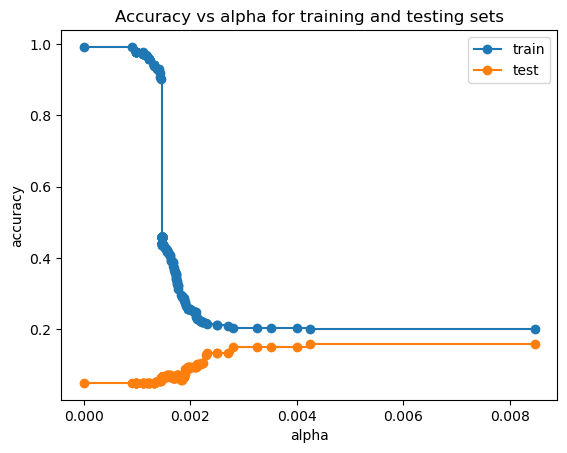

In [139]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]

# Create the plot to determine optimal alpha
plt.figure(figsize = (20, 20))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [141]:
from sklearn.model_selection import cross_val_score # For using cross validation

C:\Users\aaksh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  --------


<Axes: xlabel='Tree'>

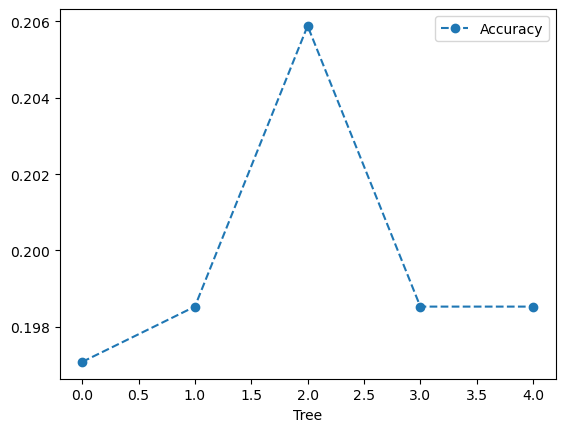

In [142]:
dt_ex = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.015)
scores_ex = cross_val_score(dt_ex, X_train, y_train, cv = 5)
df_ex = pd.DataFrame(data = {"Tree":range(5), "Accuracy":scores_ex})

# Plot the accuracies
df_ex.plot(x = "Tree", y = "Accuracy", marker = "o", linestyle = "--")

In [152]:
from sklearn.tree import plot_tree # Plotting classification trees

In [155]:
best_alpha = 0.015907

In [156]:
dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = best_alpha)

In [157]:
dt_pruned = dt_pruned.fit(X_train, y_train)

[Text(0.5, 0.75, 'num <= 0.5\ngini = 0.956\nsamples = 681\nvalue = [136, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2\n1, 4, 4, 1, 2, 1, 4, 1, 2, 1, 3, 2, 3, 3\n5, 4, 5, 6, 4, 3, 2, 5, 2, 6, 7, 2, 3, 4\n2, 5, 3, 7, 6, 5, 4, 2, 8, 2, 4, 7, 6, 5\n6, 5, 4, 2, 4, 3, 3, 4, 8, 4, 3, 5, 6, 2\n6, 3, 3, 4, 8, 2, 2, 3, 4, 3, 6, 3, 4, 4\n4, 1, 2, 4, 7, 2, 4, 2, 6, 2, 8, 2, 1, 7\n4, 3, 2, 4, 4, 4, 4, 4, 3, 2, 5, 5, 3, 4\n1, 3, 2, 7, 3, 2, 2, 1, 2, 6, 3, 1, 1, 4\n1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 3, 6, 3\n2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3\n1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]\nclass = No Heart Disease'),
 Text(0.25, 0.25, 'gini = 0.989\nsamples = 291\nvalue = [14, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0\n1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1\n0, 3, 2, 1, 2, 1, 3, 1, 1, 0, 1, 2, 2, 2\n2, 3, 4, 4, 1, 3, 1, 4, 1, 2, 5, 1, 1, 3\n1, 5, 1, 5, 1, 4, 2, 2, 3, 1, 1, 4, 5, 3\n3, 3, 

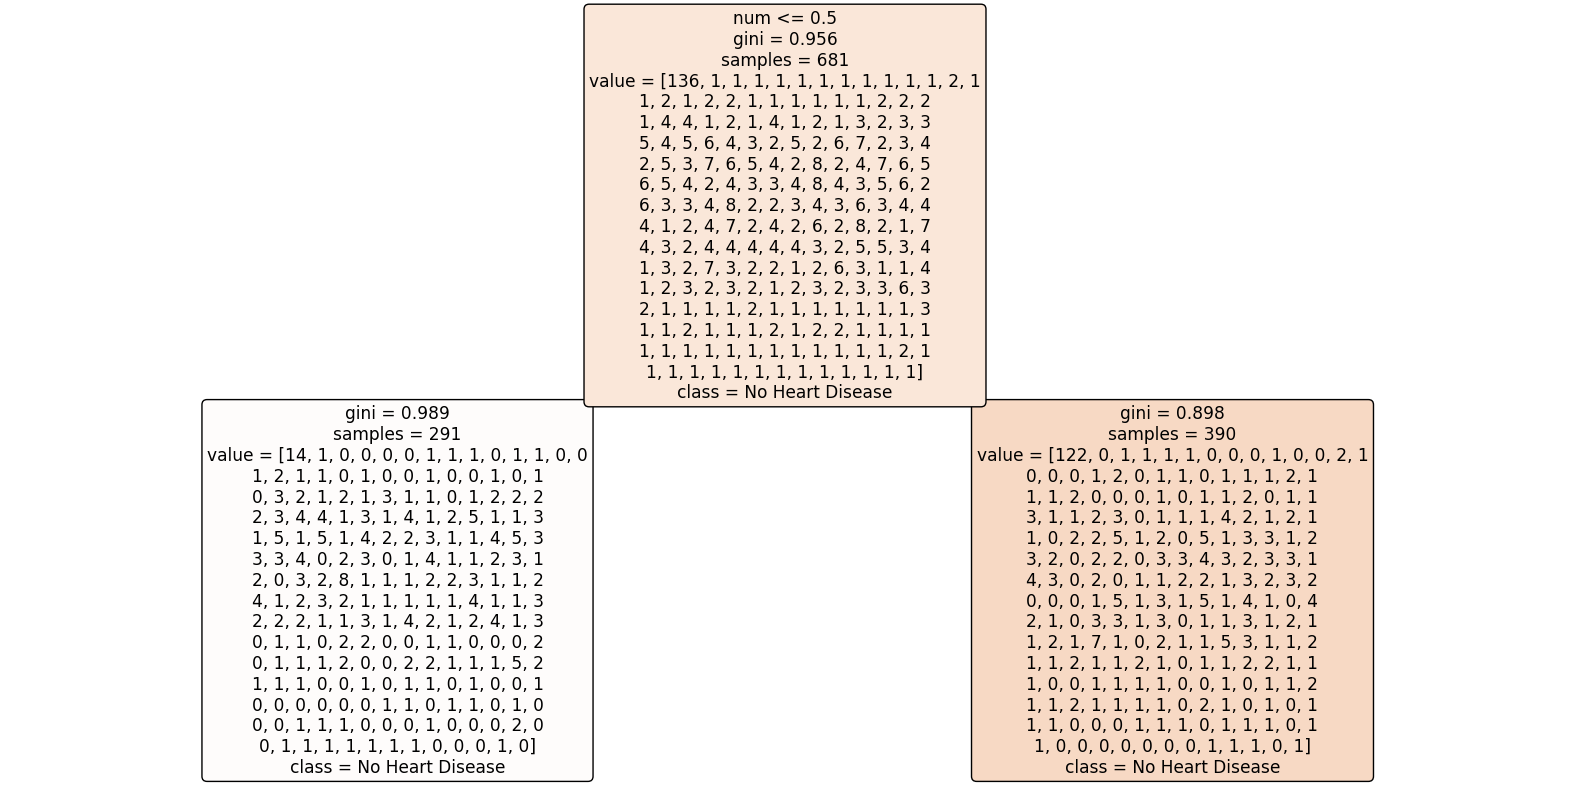

In [159]:
plt.figure(figsize = (20, 10))
plot_tree(dt_pruned, filled=True, rounded = True, class_names = ["No Heart Disease", "Yes Heart Disease"], feature_names = X.columns)